# 2nd hand car price prediction.

## Problem Statement

This dataset contains information about used cars listed on www.cardekho.com
This data can be used for a lot of purposes such as price prediction

## Data Collection
- Dataset: https://www.kaggle.com/code/mdejazulhassan/vehicle-dataset-from-cardekho/data

![img](../data/logo.jpg)

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [56]:
df = pd.read_csv('../data/car data.csv')

### First look at data

In [57]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### The columns in the given dataset is as follows:

- Car_Name: the name of the car.
- Year: the year in which the car was bought.
- Selling_Price: the price the owner wants to sell the car at(in lakhs).
- Present_Price: the current ex-showroom price of the car(in lakhs).
- Kms_Driven: the distance completed by the car in km.
- Fuel_Type: Fuel type of the car.
- Seller_Type: Defines whether the seller is a dealer or an individual.
- Transmission: Defines whether the car is manual or automatic.
- Owner: Defines the number of owners the car has previously had.

In [71]:
df['Owner'] = df['Owner'].astype('object')
df['Year'] = df['Year'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    object 
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 21.3+ KB


In [72]:
df.shape

(301, 9)

In [73]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Car_Name,301,98,city,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,301.0,16.0,2015.0,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Selling_Price,301.0,NaN,NaN,NaN,4.661296,5.082812,0.1,0.9,3.6,6.0,35.0
Present_Price,301.0,NaN,NaN,NaN,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,NaN,NaN,NaN,36947.20598,38886.883882,500.0,15000.0,32000.0,48767.0,500000.0
Fuel_Type,301,3,Petrol,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seller_Type,301,2,Dealer,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,301,2,Manual,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner,301.0,3.0,0.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
df.duplicated().sum()

2

In [75]:
df[df.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


#### Report 
- Looks like they are not dupicated. 

In [76]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

#### Report 
- Great, There is no null values.

In [77]:
numeric_features = [col for col in df.columns if df[col].dtype!='object']
numeric_features.remove('Selling_Price')
categorical_features = [col for col in df.columns if df[col].dtype=='object']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 2 numerical features : ['Present_Price', 'Kms_Driven']

We have 6 categorical features : ['Car_Name', 'Year', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


#### checking distribution of numeric features

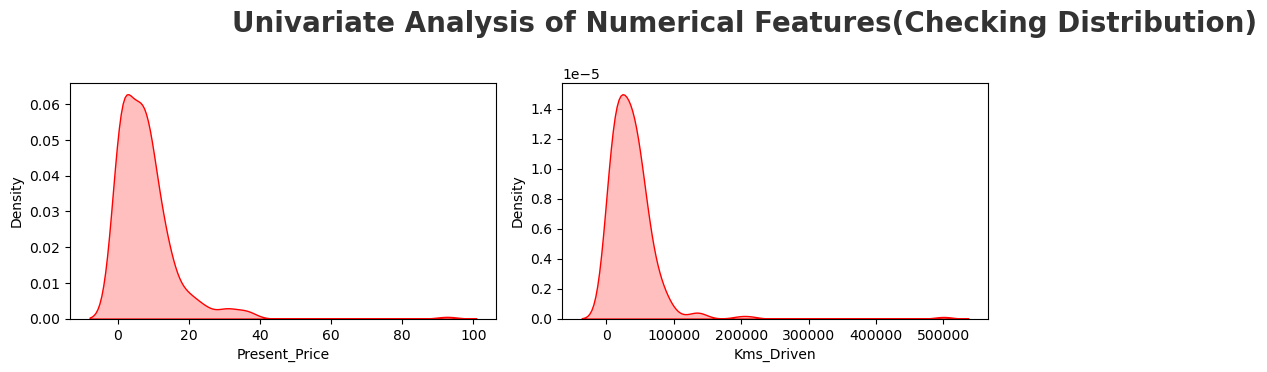

In [78]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Distribution)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# Report
- Data is normally distributed.
- We try to bring the data to normal by applying different techniques.

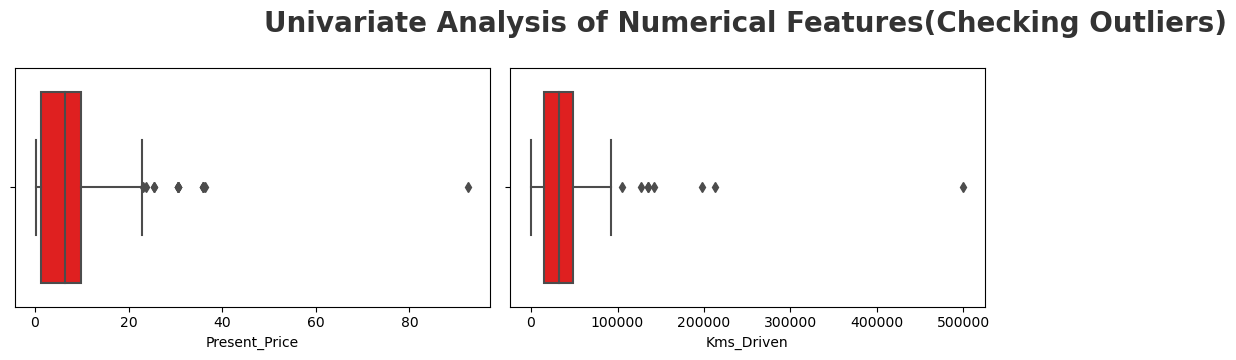

In [79]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features(Checking Outliers)', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(x=df[numeric_features[i]], color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report
- Outleirs present in all numeric feature.
- We will try to remove outliers by IQR method.

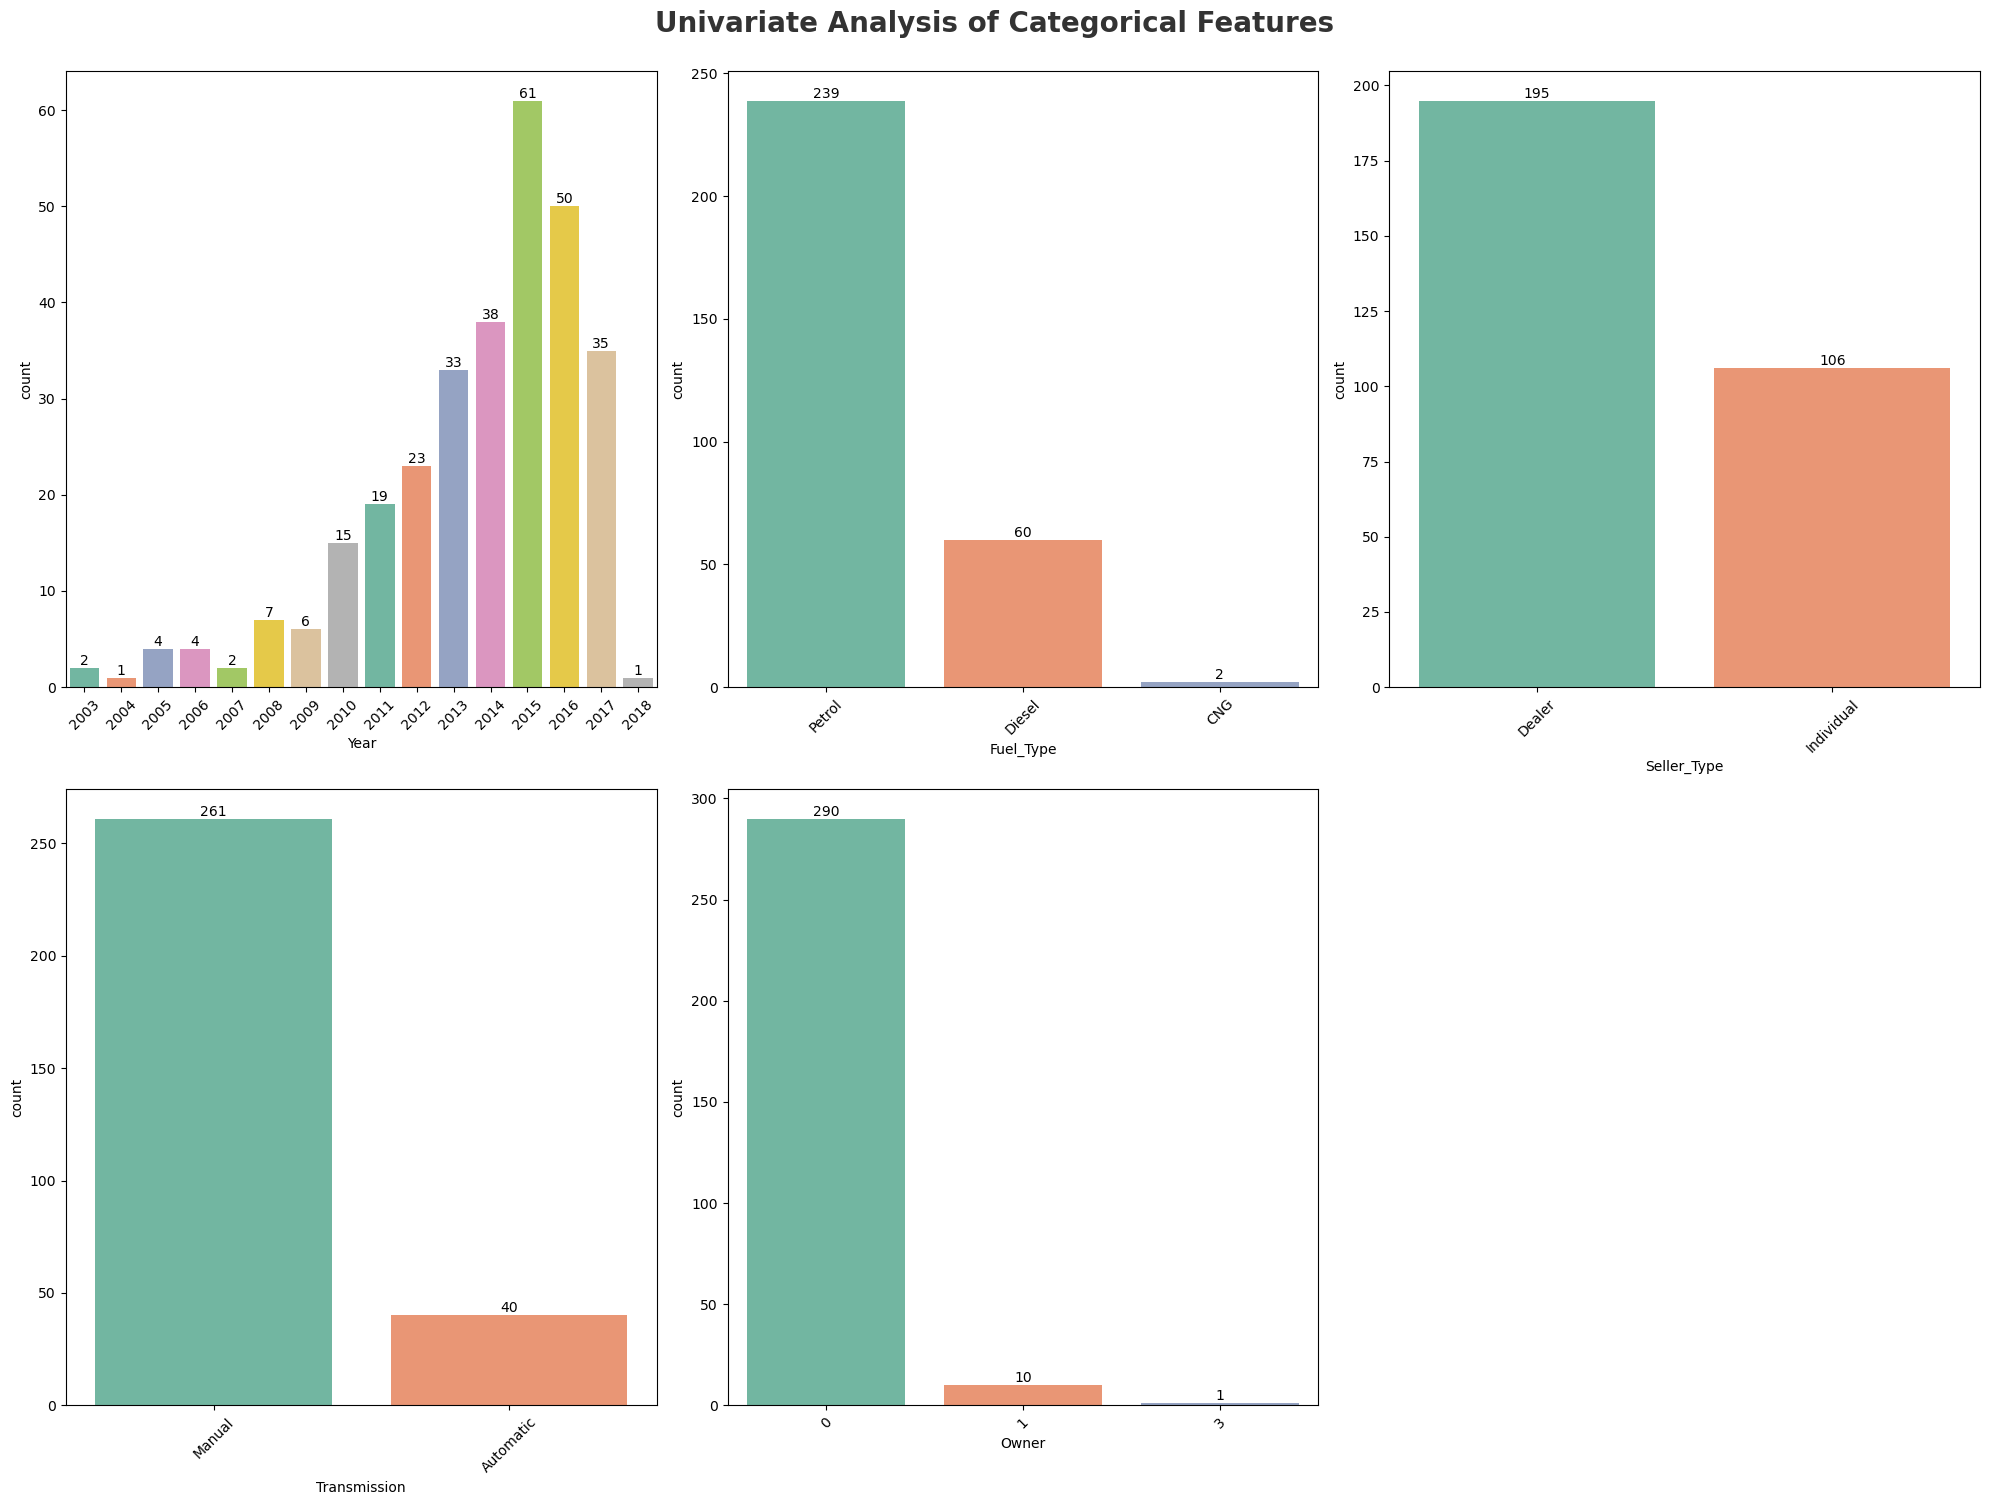

In [86]:
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = categorical_features.copy()
category.remove('Car_Name')
for i in range(0, len(category)):
    plt.subplot(2, 3, i+1)
    img = sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    for c in img.containers:
        img.bar_label(c)
    plt.tight_layout() 

#### Report:
- Most of cars were bought recently 
- Most of cars on runs on petrol.
- Most of cars owned by Dealers.
- Most of cars have manaul transmission.
- Most of cars are second hand.

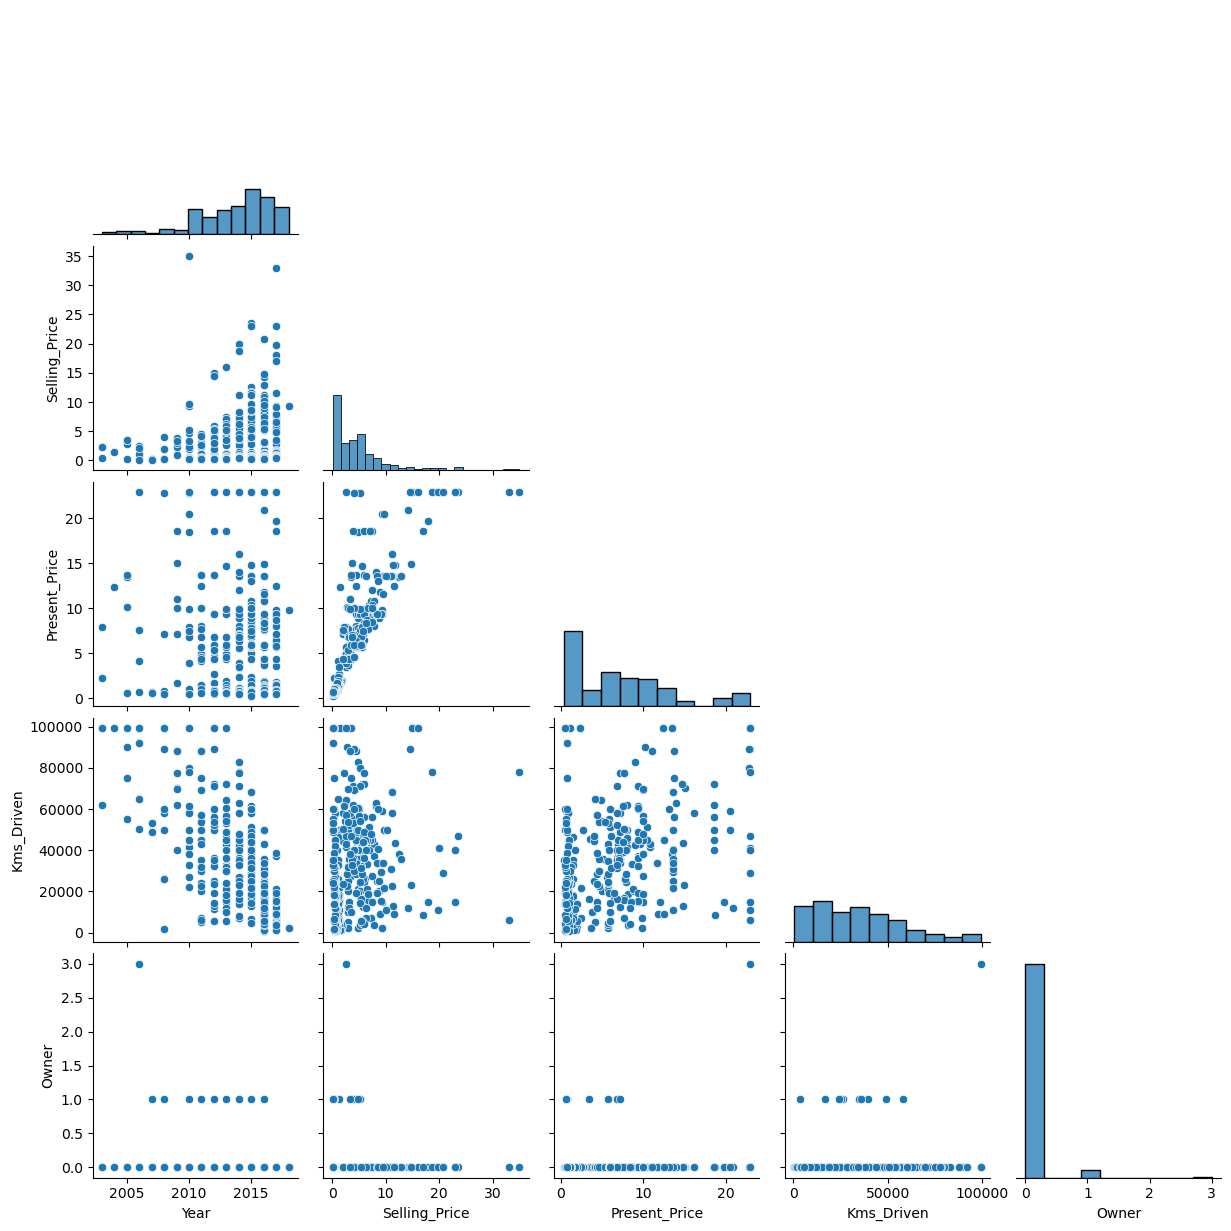

In [105]:
sns.pairplot(df, corner=True)

<AxesSubplot:>

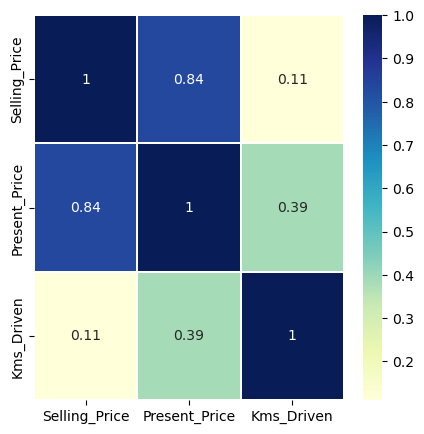

In [116]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidths=0.30)

### How different factors affect the price

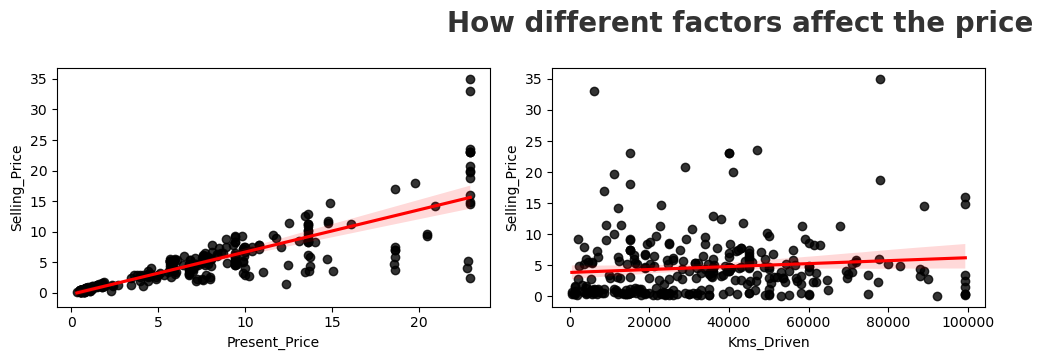

In [117]:
plt.figure(figsize=(15, 15))
plt.suptitle('How different factors affect the price ', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.regplot(x=df[numeric_features[i]],y=df['Selling_Price'],scatter_kws={"color": "black"}, line_kws={"color": "red"})
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Report:
- There is posive correclation between Selling Price and Present Price.
- There is no effect of kms_driven and selling Price.

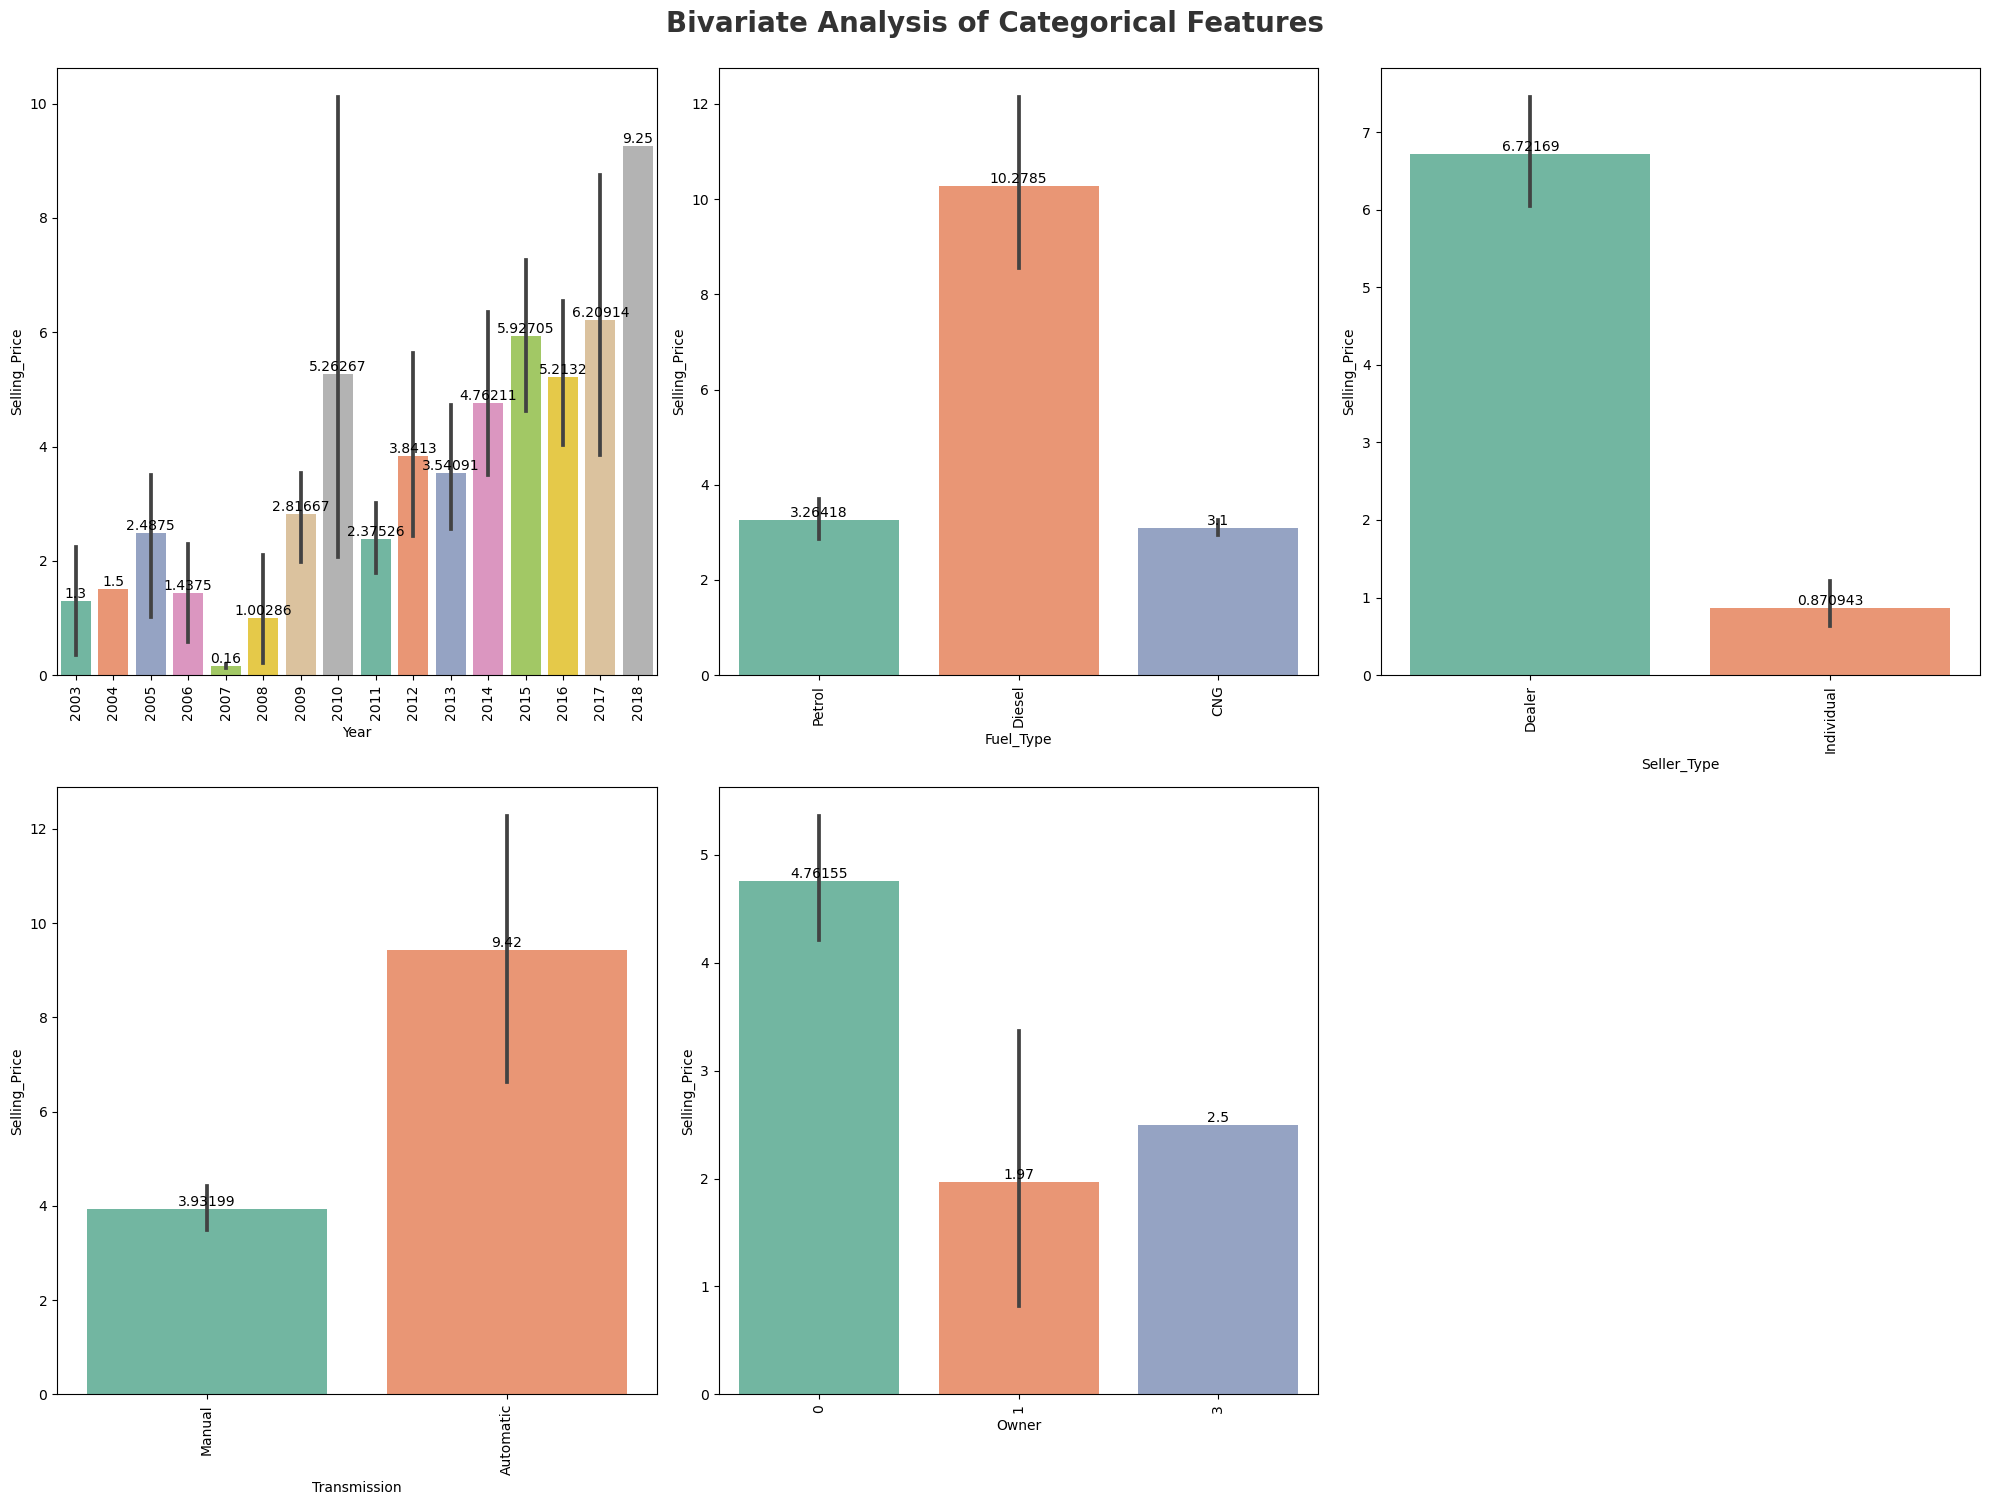

In [118]:
plt.figure(figsize=(20, 15))
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = categorical_features.copy()
category.remove('Car_Name')
for i in range(0, len(category)):
    plt.subplot(2, 3, i+1)
    img = sns.barplot(x=df[category[i]],palette="Set2",y=df['Selling_Price'])
    plt.xlabel(category[i])
    plt.xticks(rotation=90)
    for c in img.containers:
        img.bar_label(c)
    plt.tight_layout() 

#### Report
- Clearly, Cars have high selling price if
    - you are trying to sell recently bought car.
    - you have diesel car.
    - want to sell directly to customer.
    - have automatic transmission.
    - its second hand rathar than third hand or so forth.

### Conslusion:
- Your Selling Price highly depends on Present Price of car.
- There is effect of KMs driven to Selling Price. So, go for long road trip before selling the car.
- You will good price if 
    - you are trying to sell recently bought car.
    - you have diesel car.
    - want to sell directly to customer.
    - have automatic transmission.
    - its second hand rathar than third hand or so forth.

## Feature Engineering

### Removal of outliers

In [119]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[col] = np.where(df[col]>upper_limit, upper_limit, np.where(df[col]<lower_limit,lower_limit,df[col]))
    return df[df[col] > upper_limit]

In [120]:
for col in numeric_features:
    remove_outliers_IQR(col)

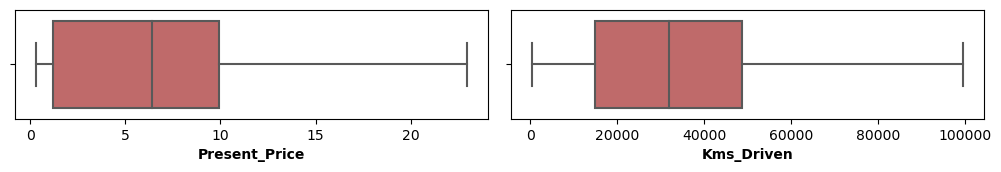

In [121]:
plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.boxplot(x=df1[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

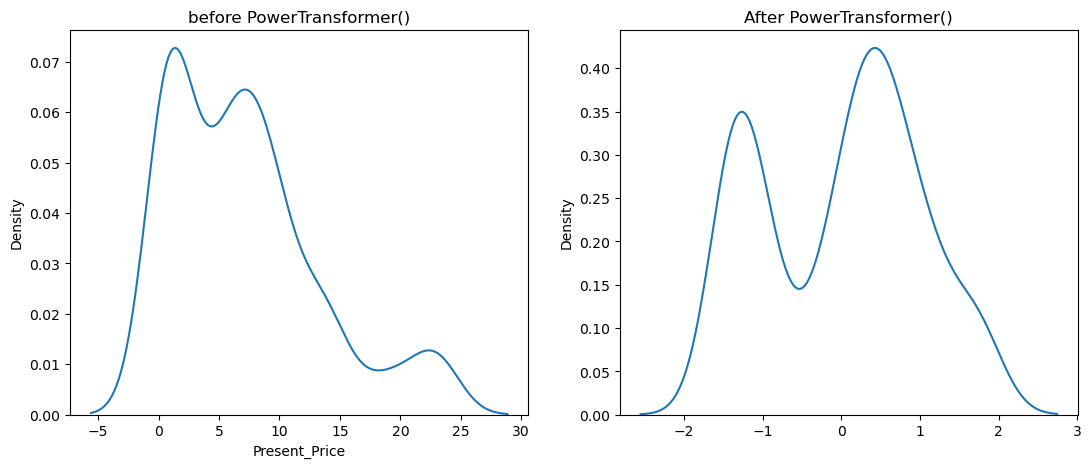

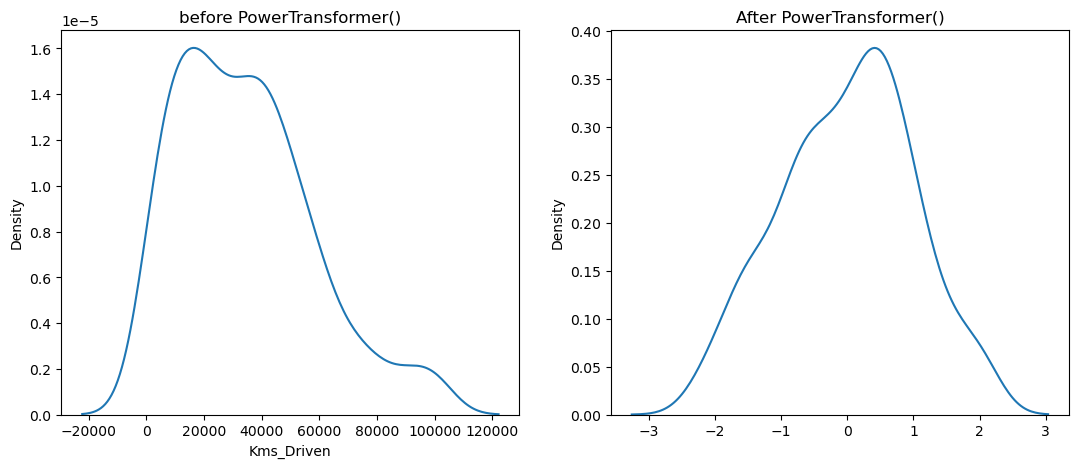

In [122]:
from sklearn.preprocessing import PowerTransformer
df2=df1.copy()
def power_plots(df,var,t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t))
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('After ' + str(t))
for col in numeric_features:
    power_plots(df,col,PowerTransformer())

In [123]:
data=pd.get_dummies(df2,drop_first=True)
data.head()

,Selling_Price,Present_Price,Kms_Driven,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,Car_Name_Bajaj Avenger 220 dtsi,...,Year_2015,Year_2016,Year_2017,Year_2018,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_1,Owner_3
0,3.35,5.59,27000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,4.75,9.54,43000.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,7.25,9.85,6900.0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,2.85,4.15,5200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,4.60,6.87,42450.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [124]:
X = data.drop('Selling_Price',axis=1)
y = data['Selling_Price']

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
def train_model(model):
    m = model[1]
    y_train_pred = cross_val_predict(model[1], X_train, y_train, cv=5)
    mae = mean_absolute_error(y_train,y_train_pred)
    mse = mean_squared_error(y_train,y_train_pred)
    rmse = np.sqrt(mse)
    rmsle = np.log(rmse)
    r2 = r2_score(y_train,y_train_pred)
    print(f'{model[0]} MAE: {mae}')
    print(f'{model[0]} MSE: {mse}')
    print(f'{model[0]} RMSE: {rmse}')
    print(f'{model[0]} RMSLE: {rmsle}')
    print(f'{model[0]} R2 score: {r2}')


In [145]:
from sklearn.linear_model import LinearRegression
train_model(('Linear Regression', LinearRegression()))

Linear Regression MAE: 1.8745078027506399
Linear Regression MSE: 9.9792285663676
Linear Regression RMSE: 3.1589917009019826
Linear Regression RMSLE: 1.1502528946882866
Linear Regression R2 score: 0.6272809629671275


In [146]:
from sklearn.linear_model import Ridge
train_model(('Ridge Regression', Ridge()))

Ridge Regression MAE: 1.2585099874486034
Ridge Regression MSE: 5.504499523523913
Ridge Regression RMSE: 2.346166985430473
Ridge Regression RMSLE: 0.852782926483562
Ridge Regression R2 score: 0.7944097834706152


In [147]:
from sklearn.neural_network import MLPRegressor
train_model(('MLPR Regression', MLPRegressor(random_state=1, max_iter=500)))

MLPR Regression MAE: 996.9072568570808
MLPR Regression MSE: 1502126.4538435154
MLPR Regression RMSE: 1225.6126850859187
MLPR Regression RMSLE: 7.111196149035505
MLPR Regression R2 score: -56102.64785761685


In [148]:
from sklearn.linear_model import Lasso
train_model(('Lasso Regression', Lasso()))

Lasso Regression MAE: 1.433758519506236
Lasso Regression MSE: 7.124915362411277
Lasso Regression RMSE: 2.6692537088878
Lasso Regression RMSLE: 0.9817989235621689
Lasso Regression R2 score: 0.7338880881265079


In [149]:
from sklearn.tree import DecisionTreeRegressor
train_model(('Decision Tree Regression', DecisionTreeRegressor()))

Decision Tree Regression MAE: 1.1171666666666666
Decision Tree Regression MSE: 6.083050000000001
Decision Tree Regression RMSE: 2.4663839928121494
Decision Tree Regression RMSLE: 0.9027531074666301
Decision Tree Regression R2 score: 0.7728012217433264


In [150]:
from sklearn.ensemble import RandomForestRegressor
train_model(('Random Forest Regression', RandomForestRegressor()))

Random Forest Regression MAE: 0.9180775000000002
Random Forest Regression MSE: 4.172192036000001
Random Forest Regression RMSE: 2.0425944374740674
Random Forest Regression RMSLE: 0.7142207829005737
Random Forest Regression R2 score: 0.8441707805736558


In [151]:
from sklearn.neighbors import KNeighborsRegressor
train_model(('KNN Regression', KNeighborsRegressor()))

KNN Regression MAE: 3.786625
KNN Regression MSE: 31.636071616666666
KNN Regression RMSE: 5.624595240252107
KNN Regression RMSLE: 1.7271489882129196
KNN Regression R2 score: -0.18159094864373837


In [152]:
from sklearn.svm import SVR
train_model(('SVM Regression', SVR()))

SVM Regression MAE: 3.3099316636826575
SVM Regression MSE: 29.27350359787982
SVM Regression RMSE: 5.410499385258243
SVM Regression RMSLE: 1.6883413964094218
SVM Regression R2 score: -0.09335025237843375


In [153]:
from sklearn.gaussian_process import GaussianProcessRegressor
train_model(('Gaussian Regression', GaussianProcessRegressor()))

Gaussian Regression MAE: 4.541449172165383
Gaussian Regression MSE: 47.070607995782765
Gaussian Regression RMSE: 6.860802285140037
Gaussian Regression RMSLE: 1.9258243860861313
Gaussian Regression R2 score: -0.7580629171946067


In [154]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='r2',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='r2')

In [155]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 10}

In [156]:
rf_reg = grid_search.best_estimator_

In [157]:
rf_reg.score(X_test,y_test)*100

92.49616854462329

In [158]:
#Saving the model
import pickle
with open('../artifact/model.pkl', 'wb') as files:
    pickle.dump(rf_reg, files)